## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Sotiris Ftiakas"
AEM = "3076"

---

# Assignment 3 - Ensemble Methods #

Welcome to your third assignment. This exercise will test your understanding on Ensemble Methods.

In [1]:
# Always run this cell
import numpy as np
import pandas as pd

# USE THE FOLLOWING RANDOM STATE FOR YOUR CODE
RANDOM_STATE = 42

## Download the Dataset ##
Download the dataset using the following cell or from this [link](https://github.com/sakrifor/public/tree/master/machine_learning_course/EnsembleDataset) and put the files in the same folder as the .ipynb file. 
In this assignment you are going to work with a dataset originated from the [ImageCLEFmed: The Medical Task 2016](https://www.imageclef.org/2016/medical) and the **Compound figure detection** subtask. The goal of this subtask is to identify whether a figure is a compound figure (one image consists of more than one figure) or not. The train dataset consits of 4197 examples/figures and each figure has 4096 features which were extracted using a deep neural network. The *CLASS* column represents the class of each example where 1 is a compoung figure and 0 is not. 


In [8]:
import urllib.request
url_train = 'https://github.com/sakrifor/public/raw/master/machine_learning_course/EnsembleDataset/train_set.csv'
filename_train = 'train_set.csv'
urllib.request.urlretrieve(url_train, filename_train)
url_test = 'https://github.com/sakrifor/public/raw/master/machine_learning_course/EnsembleDataset/test_set_noclass.csv'
filename_test = 'test_set_noclass.csv'
urllib.request.urlretrieve(url_test, filename_test)

('test_set_noclass.csv', <http.client.HTTPMessage at 0xca92255400>)

In [29]:
# Run this cell to load the data
train_set = pd.read_csv("train_set.csv").sample(frac=1).reset_index(drop=True)
train_set.head()
X = train_set.drop(columns=['CLASS'])
y = train_set['CLASS'].values

## 1.0 Testing different ensemble methods ##
In this part of the assignment you are asked to create and test different ensemble methods using the train_set.csv dataset. You should use **10-fold cross validation** for your tests and report the average f-measure and accuracy of your models.

### !!! Use n_jobs=-1 where is posibble to use all the cores of a machine for running your tests ###

### 1.1 Voting ###
Create a voting classifier which uses three estimators/classifiers. Test both soft and hard voting and choose the best one.

In [8]:
# BEGIN CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate

jobs=-1

# Here I build my classifiers:

cls1 = LogisticRegression(n_jobs=jobs) # Classifier #1 
cls2 = DecisionTreeClassifier(random_state=RANDOM_STATE) # Classifier #2
cls3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_STATE) # Classifier #3 

vcls = VotingClassifier([('LR', cls1), ('DTC1', cls2), ('DTC2', cls3)], voting='hard') # Voting Classifier (HARD) * CHOSEN ONE *

vcls2 = VotingClassifier([('LR', cls1), ('DTC1', cls2), ('DTC2', cls3)], voting="soft") # Voting Classifier (SOFT)

# Here I store the 10-fold cross validation results for soft and hard voting.

scoreHard = cross_validate(vcls, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("Hard Voting Classifier F1 Score:{}".format(scoreHard["test_f1"].mean()))            # For testing purposes
# print("Hard Voting Classifier Accuracy:{}".format(scoreHard["test_accuracy"].mean()))

scoreSoft = cross_validate(vcls2, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("Soft Voting Classifier F1 Score:{}".format(scoreSoft["test_f1"].mean()))            # For testing purposes
# print("Soft Voting Classifier Accuracy:{}".format(scoreSoft["test_accuracy"].mean()))


avg_fmeasure = scoreHard["test_f1"].mean()           # The average f-measure
avg_accuracy = scoreHard["test_accuracy"].mean()     # The average accuracy


#END CODE HERE

In [9]:
print("Classifier:")
print(vcls)
print("F1-Score:{} & Accuracy:{}".format(avg_fmeasure,avg_accuracy))

Classifier:
VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DTC1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                            

### 1.2 Stacking ###
Create a stacking classifier which uses two estimators/classifiers. Try different classifiers for the combination of the initial classifiers. Report your results in the following cell.

In [12]:
# BEGIN CODE HERE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Here I build 4 different classifiers

cls1 = LogisticRegression(n_jobs=jobs) # Classifier #1 
cls2 = DecisionTreeClassifier(random_state=RANDOM_STATE) # Classifier #2 
cls3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_STATE) # CLassifier #3
cls4 = DecisionTreeClassifier(max_leaf_nodes=350, random_state=RANDOM_STATE) # CLassifier #4

# Here I stack 2 classifiers each time, using all different combinations

scls = StackingClassifier([("LR", cls1),("DTC", cls2)]) # Stacking Classifier
scls2 = StackingClassifier([("LR", cls1),("DTC", cls3)]) # Stacking Classifier * CHOSEN ONE *
scls3 = StackingClassifier([("LR", cls1),("DTC", cls4)]) # Stacking Classifier
scls4 = StackingClassifier([("DTC1", cls3),("DTC2", cls2)]) # Stacking Classifier
scls5 = StackingClassifier([("DTC1", cls4),("DTC2", cls2)]) # Stacking Classifier
scls6 = StackingClassifier([("DTC1", cls3),("DTC2", cls4)]) # Stacking Classifier

# Here I store the 10-fold cross validation results and print the average accuracy and f1_score of the stacking classifier.

score = cross_validate(scls2, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("Stacking Classifier F1 Score:{}".format(score["test_f1"].mean()))            # For testing purposes
# print("Stacking Classifier Accuracy:{}".format(score["test_accuracy"].mean()))

# Change scls with the best stacking classifier

scls = scls2 # Stacking Classifier * CHOSEN ONE *

avg_fmeasure = score["test_f1"].mean()          # The average f-measure
avg_accuracy = score["test_accuracy"].mean()    # The average accuracy

#END CODE HERE

In [13]:
print("Classifier:")
print(scls)
print("F1-Score:{} & Accuracy:{}".format(avg_fmeasure,avg_accuracy))

Classifier:
StackingClassifier(cv=None,
                   estimators=[('LR',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=-1, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('DTC',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                     

### 1.3 Report the results ###  
Report the results of your experiments in the following cell. How did you choose your initial classifiers? 

### 1.1 Voting ( Report )
I tried using different classifiers based on the ones we have previously learned, so i used a Logistic Regressor, and many Decision Trees with different parameters (max_depth, max_leaf_nodes, criterion, etc.). Then i used a cross validation on the dataset given and I ended up with the following results: 

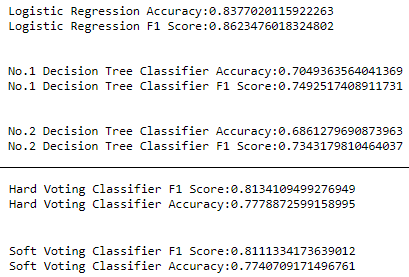

I didn't really notice any significant difference between my ***hard*** and my ***soft*** voting classifiers, but the ***hard*** voting classifier achieved slightly better accuracy and f1 score so **I chose the hard voting classifier**.

____

Something worth noticing is that due to linear regression having better accuracy than the trees, and the fact that the Voting Classifier used 2 Decision Trees and only 1 Linear Regressor, we can see that the Voting Classifier didnt achieve better accuracy than the simple Linear Regression. ***(due to majority decision)***

### 1.2 Stacking ( Report )
Here i tried using 4 different classifiers, which gave me 6 different stacking classifiers, doing all the combinations. The classifiers and stacking classifiers I used can be seen on the according cell. The results of the 6 different stacking classifiers were the following: 

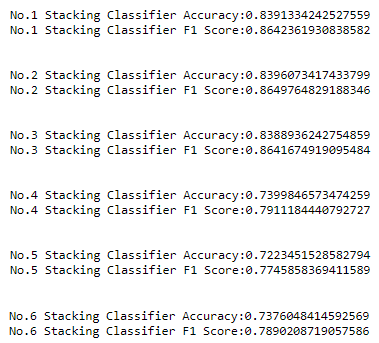

As we can see, the first 3 stacking classifiers that used the Linear Regressor, achieved significant better accuracy and f1 score than the stacking classifiers using only Decision Trees.

The best result was achieved by the second classifier, using the Linear Regressor and a Decision Tree with *max_nodes=3* and *criterion="entropy"*. So **the stacking classifier I used was the No.2** .

________

***NOTE:*** *Report results might be a little different than shown results, because I first used the ***cross_val_score*** function and finally changed to ***cross_validate*** function*


## 2.0 Randomization ##

**2.1** You are asked to create three ensembles of decision trees where each one is produced with a different way from the ones discussed in the lecture for producing homogeneous ensembles. Compare them with a simple decision tree classifier and report your results in the dictionaries (dict) below using as key the given name of your classifier and as value the f1/accuracy score. The dictionaries should contain four different elements.  

In [5]:
# BEGIN CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


ens1 = BaggingClassifier(DecisionTreeClassifier(random_state=RANDOM_STATE), n_estimators=100, n_jobs=jobs, random_state=RANDOM_STATE)
ens2 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=jobs)
ens3 = GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE)
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

score1 = cross_validate(ens1, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("No.1 Ensemble F1 Score:{}".format(score1["test_f1"].mean()))            # For testing purposes
# print("No.1 Ensemble Accuracy:{}".format(score1["test_accuracy"].mean()))

score2 = cross_validate(ens2, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("No.2 Ensemble F1 Score:{}".format(score2["test_f1"].mean()))            # For testing purposes
# print("No.2 Ensemble Accuracy:{}".format(score2["test_accuracy"].mean()))

score3 = cross_validate(ens3, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("No.3 Ensemble F1 Score:{}".format(score3["test_f1"].mean()))            # For testing purposes
# print("No.3 Ensemble Accuracy:{}".format(score3["test_accuracy"].mean()))

score4 = cross_validate(tree, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("Decision Tree Classifier F1 Score:{}".format(score4["test_f1"].mean()))            # For testing purposes
# print("Decision Tree Classifier Accuracy:{}".format(score4["test_accuracy"].mean()))

# The list of names and accuracy of the models.

f_measures = dict({'Ensemble with Bagging(Decision Tree)':score1["test_f1"].mean(), 'Ensemble with Random Forest':score2["test_f1"].mean(), 'Ensemble with Gradient Boosting':score3["test_f1"].mean(), 'Simple Decision Tree':score4["test_f1"].mean()})
accuracies = dict({'Ensemble with Bagging(Decision Tree)':score1["test_accuracy"].mean(), 'Ensemble with Random Forest':score2["test_accuracy"].mean(), 'Ensemble with Gradient Boosting':score3["test_accuracy"].mean(), 'Simple Decision Tree':score4["test_accuracy"].mean()})
# Example f_measures = {'Simple Decision':0.8551, 'Ensemble with random ...': 0.92, ...}


#END CODE HERE

In [6]:
print(ens1)
print(ens2)
print(ens3)
print(tree)
for name,score in f_measures.items():
    print("Classifier:{} -  F1:{}".format(name,score))
for name,score in accuracies.items():
    print("Classifier:{} -  Accuracy:{}".format(name,score))

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

**2.2** Describe your classifiers and your results.

### 2.0 Randomization ( Report )
Here, we were asked to create 3 different homogeneous ensembles of decision trees and compare them to a simple decision tree classifier. The methods I used were:
- ***No.1) Bagging***
- ***No.2) Random Forest***
- ***No.3) Gradient Boosting***
- ***Simple Decision Tree***

The corresponding results are shown on the image below:

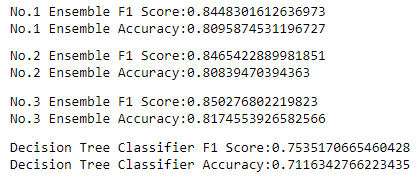

We can see that the Gradient Boosting appears to achieve slightly better results in comparison to the other 2 ensembles, let alone the simple decision tree classifier.

**2.3** Increasing the number of estimators in a bagging classifier can drastically increase the training time of a classifier. Is there any solution to this problem? Can the same solution be applied to boosting classifiers?

When we increase the number of estimators, it is obvious that the time needed to compute the predictions will increase significantly. What we can do to solve this problem is to **parallelise** the fit() function, by *increasing the **n_jobs** parameter*. Potentially, we could put n_jobs = -1, in order to utilize all of our computer's cores.

However, **boosting classifiers can't be easily parallelized**. The problem is that the weightings of the examples in the next iteration of the algorithm, depend on the performances of the previous iteration. This implies that a new iteration cannot be started before the previous one finishes and as a result, parallilism here is difficult *(maybe impossible?)*.

## 3.0 Creating the best classifier ##

**3.1** In this part of the assignment you are asked to train the best possible ensemble! Describe the process you followed to achieve this result. How did you choose your classifier and your parameters and why. Report the f-measure & accuracy (10-fold cross validation) of your final classifier and results of classifiers you tried in the cell following the code. Can you achieve an accuracy over 83-84%?

In [18]:
# BEGIN CODE HERE

ens1= LogisticRegression(n_jobs=jobs) 
ens2= GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE)
ens3= BaggingClassifier(LogisticRegression(), n_estimators=100, n_jobs=jobs, random_state=RANDOM_STATE)
ens4 = VotingClassifier([('ENS1', ens1), ('ENS2', ens2), ('ENS3', ens3)], voting='hard')                   # * CHOSEN *
ens5 = StackingClassifier([("ENS1", ens1),("ENS2", ens2)]) 

scoreEns = cross_validate(ens4, X, y, cv=10, scoring=('f1','accuracy'), n_jobs=jobs)
# print("Voting Classifier F1 Score:{}".format(scoreEns["test_f1"].mean()))           # For testing purposes
# print("Voting Classifier Accuracy:{}".format(scoreEns["test_accuracy"].mean()))

best_cls = ens4

best_fmeasure = scoreEns["test_f1"].mean()
best_accuracy = scoreEns["test_accuracy"].mean()

#END CODE HERE

In [21]:
print("Classifier:")
print(best_cls)
print("F1-Score:{} & Accuracy:{}".format(best_fmeasure,best_accuracy))

Classifier:
VotingClassifier(estimators=[('ENS1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=2,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ENS2',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=...
                    

**3.2** Describe the process you followed to achieve this result. How did you choose your classifier and your parameters and why. Report the f-measure & accuracy (10-fold cross validation) of your final classifier and results of classifiers you tried in the cell following the code.

# 3.0 Creating the best classifier ( Report )

I tried many ensemble classifiers with different parameters and i finally ended up with the classifiers with the best results, that I include in the exercise above.

The results of each can be shown here:

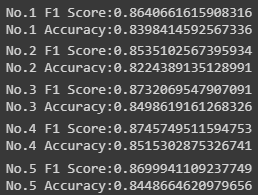

As a result, the **No.4 ensemble** achieved the best possible results, achieving accuracy of more than 85% *(84.8% due to using different cross validation methods on Jupyter and Collab)*  on this particular dataset. ***This Ensemble*** is a ***Hard Voting Classifier*** that uses ***Logistic Regression, Gradient Boosting and a Bagging Classifier(Logistic Regression)***.

**3.3** Create a classifier that is going to be used in production - in a live system. Use the *test_set_noclass.csv* to make predictions. Store the predictions in a list.  

In [35]:
# BEGIN CODE HERE

# First we load the test dataset

test_set = pd.read_csv("test_set_noclass.csv").sample(frac=1).reset_index(drop=True)
X_test = test_set


ens1= LogisticRegression(n_jobs=jobs) 
ens2= GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE)
ens3= BaggingClassifier(LogisticRegression(), n_estimators=100, n_jobs=jobs, random_state=RANDOM_STATE)

cls = VotingClassifier([('Logistic Regression', ens1), ('Gradient Boosting', ens2), ('Bagging(Logistic Regression)', ens3)], voting='hard')                 

model = cls.fit(X,y)
y_pred = model.predict(X_test)


predictions = y_pred

#END CODE HERE

In [42]:
print(cls)
print(predictions)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=2,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         crit...
                                                                                  max_it

LEAVE HERE ANY COMMENTS ABOUT YOUR CLASSIFIER

I used the same ensemble I constructed on the previous exercise.

Since our the description "production - live system" doesn't really specify any time limit, I will stick to my previous ensemble, even though it is somewhat slow.

If the time limit was small, I would use an enemble without boosting techniques because as we mentioned on 2.3 , their function can not be performed parallely.


#### This following cell will not be executed. The test_set.csv with the classes will be made available after the deadline and this cell is for testing purposes!!! Do not modify it! ###

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
final_test_set = pd.read_csv('test_set.csv')
ground_truth = final_test_set['CLASS']
print("Accuracy:{}".format(accuracy_score(predictions,ground_truth)))
print("F1-Score:{}".format(f1_score(predictions,ground_truth)))